In [ ]:
# import cv2
# import numpy as np
# import colorsys
# import os
# import random
# import time
# import tensorflow as tf
# from keras import backend as K
# from keras.layers import Input
# from mrcnn import utils
# from mrcnn import visualize
# from mrcnn.config import Config
# from mrcnn.model import MaskRCNN

# # Define the custom configuration class for the Mask R-CNN model
# class CustomConfig(Config):
#     NAME = "custom"
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1
#     NUM_CLASSES = 2  # background + 1 (your object)
#     STEPS_PER_EPOCH = 100
#     DETECTION_MIN_CONFIDENCE = 0.9

# # Define the colors for each class label
# CLASS_COLORS = visualize.random_colors(2)

# # Load the pre-trained Mask R-CNN model
# model = MaskRCNN(mode="inference", model_dir=".", config=CustomConfig())
# model_path = "path/to/model.h5"
# model.load_weights(model_path, by_name=True)

# # Load the input image
# image = cv2.imread("path/to/image.jpg")

# # Convert the image from BGR to RGB
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Run object detection on the input image using the Mask R-CNN model
# results = model.detect([image], verbose=1)

# # Extract the predicted bounding boxes, class IDs, and scores
# r = results[0]
# boxes = r['rois']
# class_ids = r['class_ids']
# scores = r['scores']

# # Print the predicted class IDs and scores for each object detected in the image
# for i in range(len(class_ids)):
#     print("Object {}: Class = {}, Score = {}".format(i+1, class_ids[i], scores[i]))

# # Visualize the image with the predicted bounding boxes and class labels
# for i in range(len(boxes)):
#     box = boxes[i]
#     class_id = class_ids[i]
#     score = scores[i]
    
#     # Draw the bounding box and label for each object detected in the image
#     color = CLASS_COLORS[class_id]
#     label = "Object {} ({:.2f})".format(class_id, score)
#     cv2.rectangle(image, (box[1], box[0]), (box[3], box[2]), color, thickness=2)
#     cv2.putText(image, label, (box[1], box[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness=2)

# # Display the output image with the predicted objects
# cv2.imshow("Output", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
!unzip "/content/drive/MyDrive/Dataset/archive (3).zip"

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import random

# Define the directory containing your dataset
dataset_dir = '/content/Train'

# Define the classes you want to remove photos from
classes_to_remove = ['Abuse', 'Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

# Define the percentage of photos to remove from each class
percent_to_remove = 0.96

# Loop over each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir) and class_name in classes_to_remove:
        # Get a list of all photos in the class directory
        photos = os.listdir(class_dir)
        num_photos = len(photos)
        
        # Determine how many photos to remove based on the specified percentage
        num_to_remove = int(num_photos * percent_to_remove)
        
        # Randomly select photos to remove
        photos_to_remove = random.sample(photos, num_to_remove)
        
        # Delete the selected photos
        for photo in photos_to_remove:
            photo_path = os.path.join(class_dir, photo)
            os.remove(photo_path)

In [ ]:
# import os
# import random

# Define the directory containing your dataset
dataset_dir = '/content/Test'

# Define the classes you want to remove photos from
classes_to_remove = ['Abuse', 'Arrest','Arson','Assault','Burglary','Explosion','Fighting','NormalVideos','RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

# Define the percentage of photos to remove from each class
percent_to_remove = 0.8

# Loop over each class directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir) and class_name in classes_to_remove:
        # Get a list of all photos in the class directory
        photos = os.listdir(class_dir)
        num_photos = len(photos)
        
        # Determine how many photos to remove based on the specified percentage
        num_to_remove = int(num_photos * percent_to_remove)
        
        # Randomly select photos to remove
        photos_to_remove = random.sample(photos, num_to_remove)
        
        # Delete the selected photos
        for photo in photos_to_remove:
            photo_path = os.path.join(class_dir, photo)
            os.remove(photo_path)

In [ ]:
train_dir = "/content/Train"
test_dir = "/content/Test"

In [ ]:
SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 5
LR =  0.00003

In [ ]:
# crime_types=os.listdir(train_dir)
# n=len(crime_types)
# print("Number of crime categories : ",n)

crime_types = os.listdir(train_dir)
n = len(crime_types)
print("Number of crime categories:", n)

for i, crime_type in enumerate(crime_types):
    print("Index:", i, "Class name:", crime_type)


Number of crime categories: 14
Index: 0 Class name: Robbery
Index: 1 Class name: NormalVideos
Index: 2 Class name: Stealing
Index: 3 Class name: Arrest
Index: 4 Class name: Arson
Index: 5 Class name: Burglary
Index: 6 Class name: Explosion
Index: 7 Class name: RoadAccidents
Index: 8 Class name: Assault
Index: 9 Class name: Shoplifting
Index: 10 Class name: Abuse
Index: 11 Class name: Vandalism
Index: 12 Class name: Shooting
Index: 13 Class name: Fighting


In [ ]:
# crimes={}
# train=test=0
# for clss in crime_types:
#     num=len(os.listdir(os.path.join(train_dir,clss)))
#     train+=num
#     test+=len(os.listdir(os.path.join(test_dir,clss)))
    
#     crimes[clss]=num
# --------------------------------------------------------------------------
crimes = {}
train = test = 0

for i, clss in enumerate(crime_types):
    num = len(os.listdir(os.path.join(train_dir, clss)))
    train += num
    test += len(os.listdir(os.path.join(test_dir, clss)))

    crimes[clss] = num
    
    print(f"Index: {i}, Class name: {clss} = {num}")

print(f"Total number of training images: {train}")
print(f"Total number of testing images: {test}")
# -----------------------------------------------------------------------------

# crimes = {}
# train = test = 0
# output_list = []

# for i, clss in enumerate(crime_types):
#     num = len(os.listdir(os.path.join(train_dir, clss)))
#     train += num
#     test += len(os.listdir(os.path.join(test_dir, clss)))
#     crimes[clss] = num
#     output_list.append(f"Index: {i}, Class name: {clss}, Number of images: {num}")

# output_list.append(f"Total number of training images: {train}")
# output_list.append(f"Total number of testing images: {test}")

# # print each item in the list
# for item in output_list:
#     print(item)


Index: 0, Class name: Robbery = 1660
Index: 1, Class name: NormalVideos = 37911
Index: 2, Class name: Stealing = 1793
Index: 3, Class name: Arrest = 1056
Index: 4, Class name: Arson = 977
Index: 5, Class name: Burglary = 1581
Index: 6, Class name: Explosion = 751
Index: 7, Class name: RoadAccidents = 940
Index: 8, Class name: Assault = 415
Index: 9, Class name: Shoplifting = 994
Index: 10, Class name: Abuse = 764
Index: 11, Class name: Vandalism = 546
Index: 12, Class name: Shooting = 286
Index: 13, Class name: Fighting = 988
Total number of training images: 50662
Total number of testing images: 22267


In [ ]:
print(crimes)

{'Robbery': 1660, 'NormalVideos': 37911, 'Stealing': 1793, 'Arrest': 1056, 'Arson': 977, 'Burglary': 1581, 'Explosion': 751, 'RoadAccidents': 940, 'Assault': 415, 'Shoplifting': 994, 'Abuse': 764, 'Vandalism': 546, 'Shooting': 286, 'Fighting': 988}


In [ ]:
# pip install keras


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img


from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

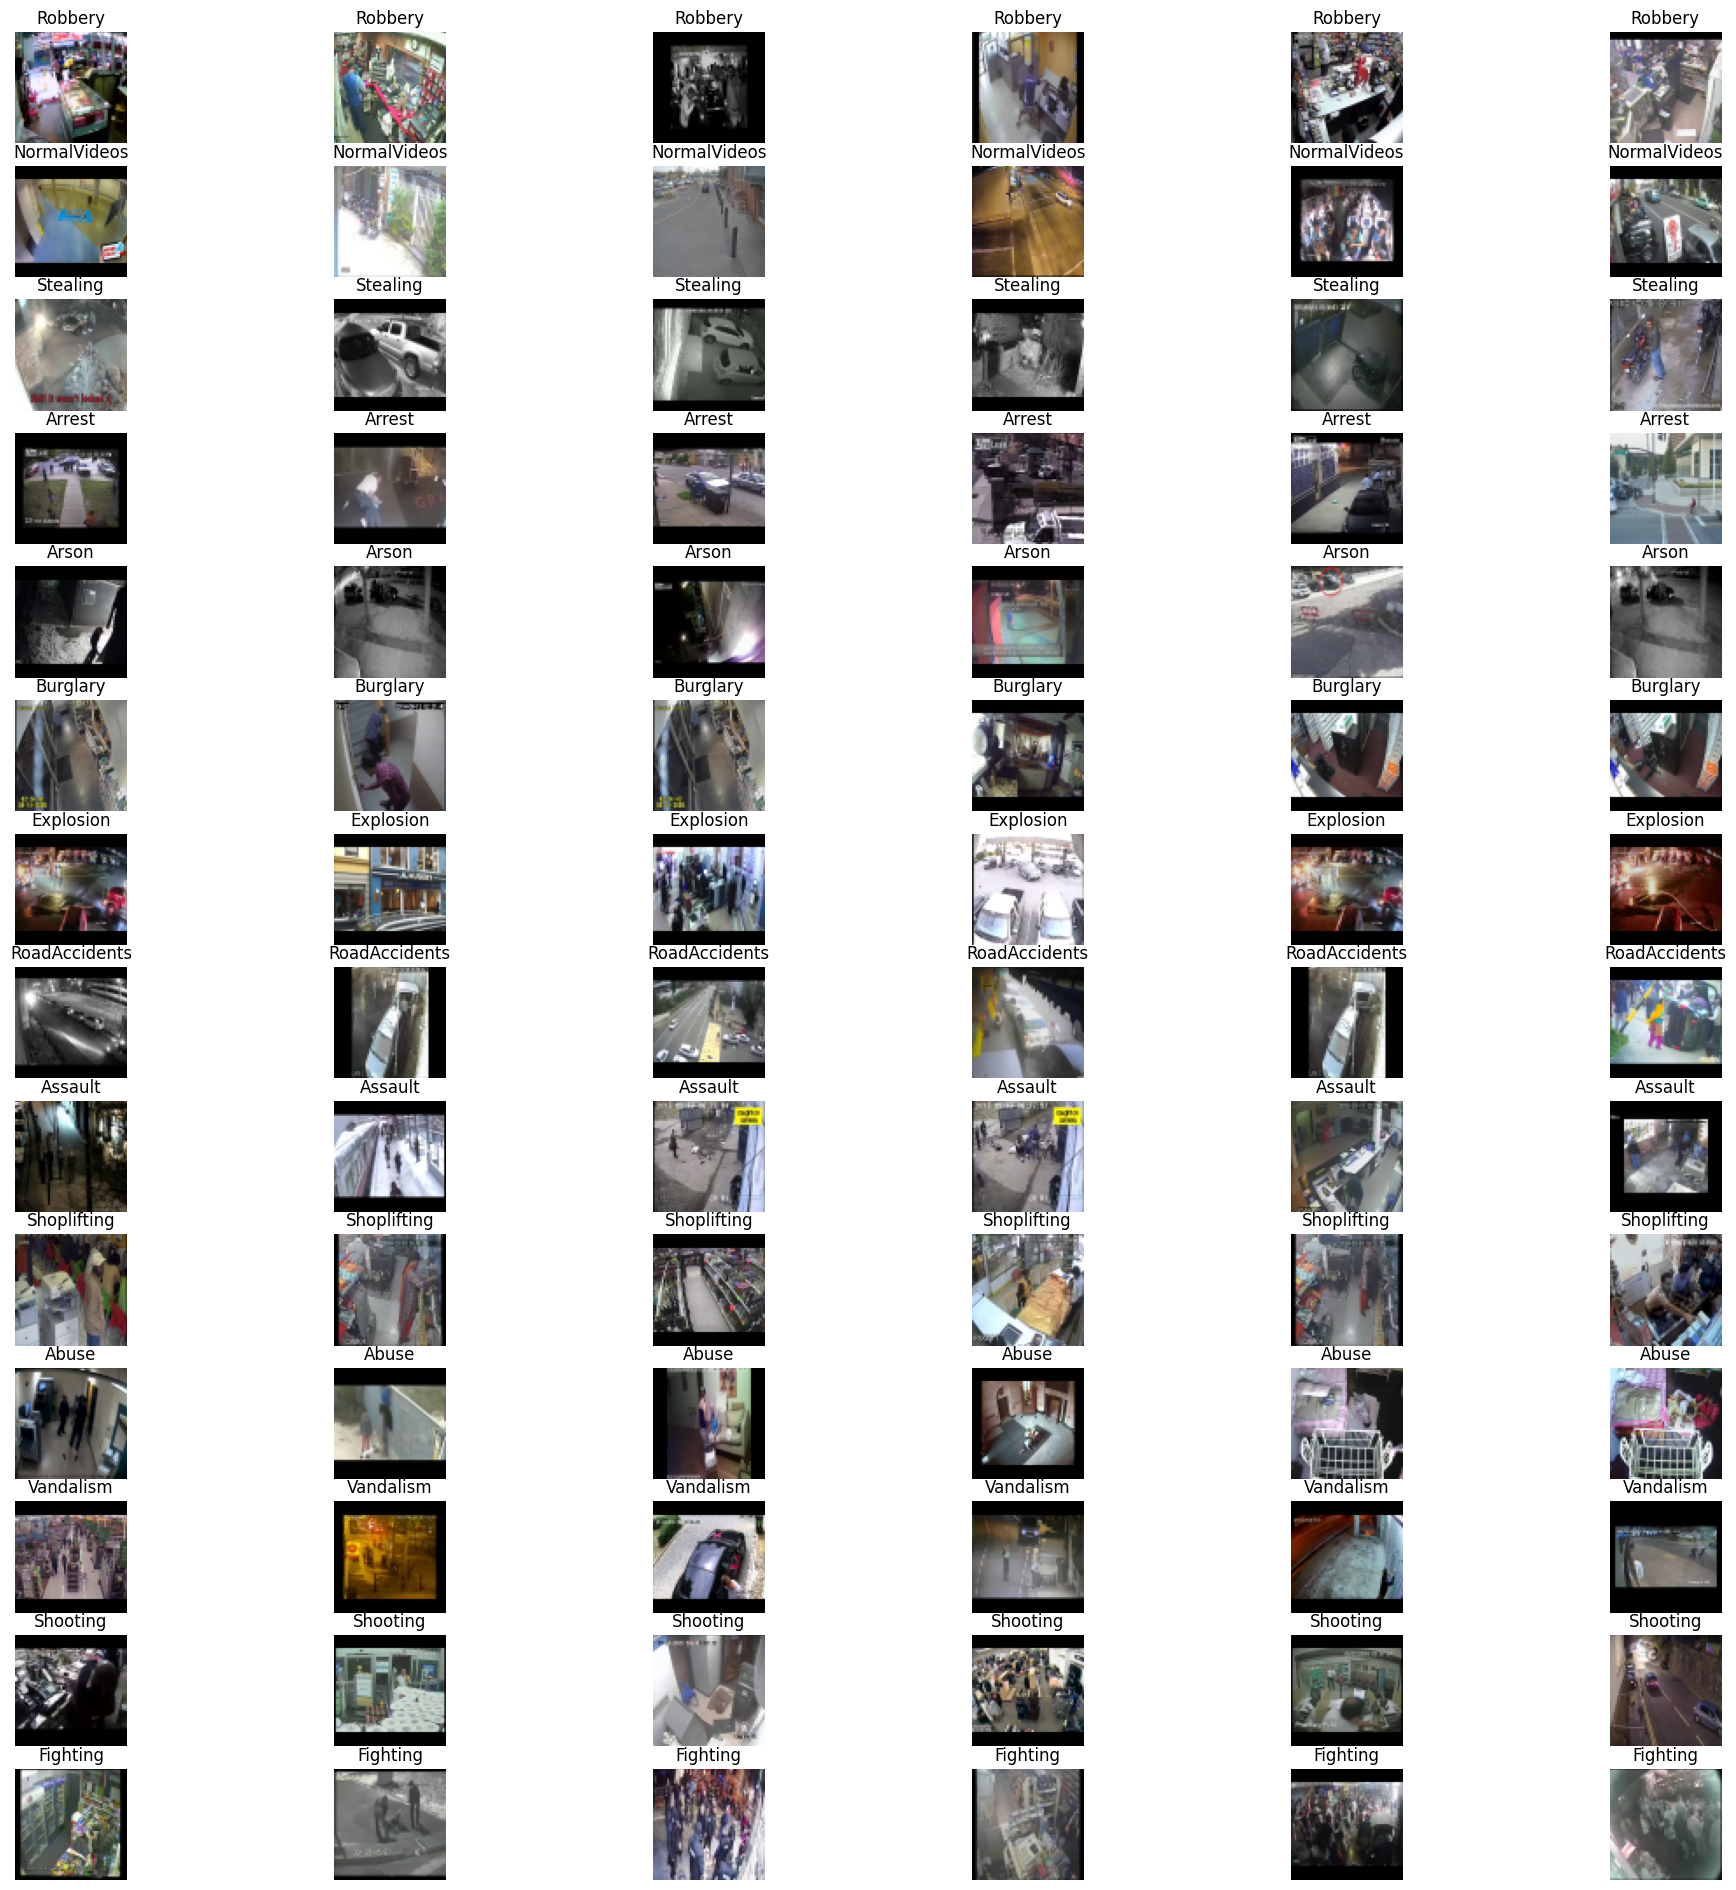

In [ ]:
# expression = 'abuse'
# test_folder_path = '/content/Test'  # path to the Test folder

# plt.figure(figsize= (12,12))
# for i in range(1, 10, 1):
#     plt.subplot(3,3,i)
#     img = load_img(test_folder_path + expression + "/"+
#                   os.listdir(test_folder_path + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
#     plt.imshow(img)   
# plt.show()


# # for print one class of images
# import os
# from tensorflow.keras.preprocessing.image import load_img
# import matplotlib.pyplot as plt

# expression = 'Abuse'
# test_folder_path = '/content/Train'  # modify this to the path of your "Test" folder

# plt.figure(figsize= (12,12))
# for i in range(1, 10, 1):
#     plt.subplot(3,3,i)
#     img = load_img(os.path.join(test_folder_path, expression, os.listdir(os.path.join(test_folder_path, expression))[i]), target_size=(IMG_HEIGHT, IMG_WIDTH))
#     plt.imshow(img)   
# plt.show()


# ---------------------------------------------------------------------------------
import os
import random
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

folder_path = '/content/Train'
classes = os.listdir(folder_path)
num_classes = len(classes)
images_per_class = 6

plt.figure(figsize=(24, 24))

for i, class_name in enumerate(classes):
    class_folder_path = os.path.join(folder_path, class_name)
    image_paths = os.listdir(class_folder_path)
    random.shuffle(image_paths)
    for j in range(images_per_class):
        plt.subplot(num_classes, images_per_class, i*images_per_class + j + 1)
        img = load_img(os.path.join(class_folder_path, image_paths[j]), target_size=(IMG_HEIGHT, IMG_WIDTH))
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
# ----------------------------------------------------------------------------------









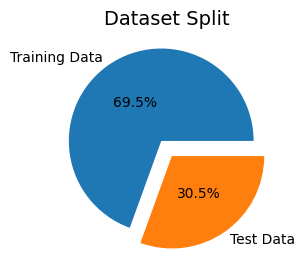

In [ ]:

plt.figure(figsize=(5, 3))
plt.pie(x=np.array([train,test]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Dataset Split", fontsize=14);

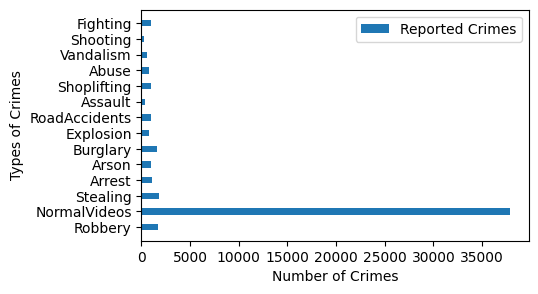

In [ ]:
plt.figure(figsize=(5,3))
plt.barh(list(crimes.keys()), list(crimes.values()), height=0.4,align="center", label='Reported Crimes')
plt.xticks(rotation=0)

plt.ylabel("Types of Crimes")
plt.xlabel("Number of Crimes")
plt.legend()
plt.show()


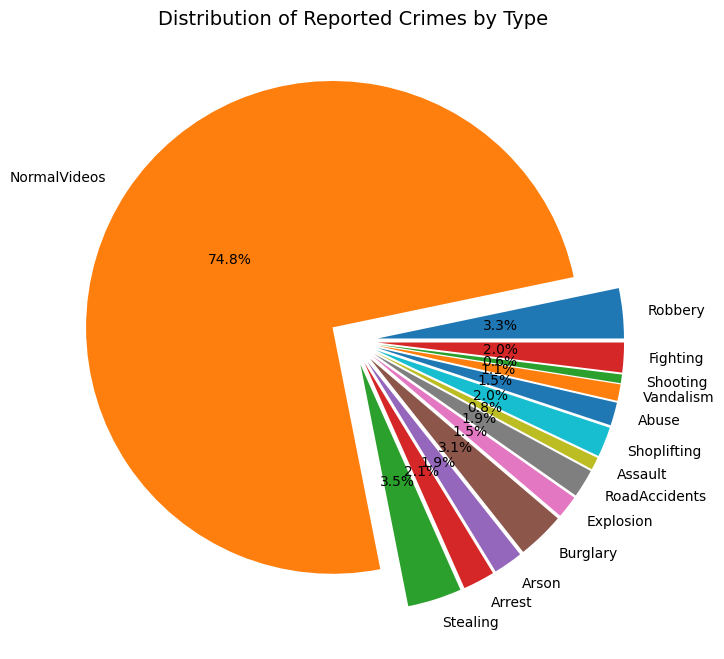

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x=np.array(list(crimes.values())), autopct="%.1f%%", explode=[0.1]*n,labels=list(crimes.keys()), pctdistance=0.5)
plt.title("Distribution of Reported Crimes by Type", fontsize=14);

In [ ]:
IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)
# because we use ConvLSTM2D
# time_step = 25
# INPUT_SHAPE = (25, IMG_HEIGHT, IMG_WIDTH, 3)


In [ ]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

Found 50662 files belonging to 14 classes.
Using 40530 files for training.


In [ ]:
val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

Found 50662 files belonging to 14 classes.
Using 10132 files for validation.


In [ ]:
test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 22267 files belonging to 14 classes.


In [ ]:
def transfer_learning():
    # Load the DenseNet121 model without the top layer, with the specified input shape and weights pre-trained on ImageNet.
    base_model = DenseNet121(include_top=False, input_shape=INPUT_SHAPE, weights="imagenet")
    
    # Freeze the layers up to the given threshold index
    # This means that the weights of the layers before this index will not be updated during training
    thr = 149
    for layers in base_model.layers[:thr]:
        layers.trainable = False
    
    # Unfreeze the layers after the threshold index
    # This means that the weights of the layers after this index will be updated during training
    for layers in base_model.layers[thr:]:
        layers.trainable = True
    
    # Return the base model with the specified layers frozen and unfrozen
    return base_model


In [ ]:
# from tensorflow.keras.layers import ConvLSTM2D


In [ ]:
# from keras.layers import ConvLSTM2D

# def create_model():
#     model=Sequential()

#     base_model=transfer_learning()
#     model.add(base_model)
    
#     model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), activation="relu", padding="same", return_sequences=True))
    
#     model.add(GlobalAveragePooling2D())
    
#     model.add(Dense(256, activation="relu"))
#     model.add(Dropout(0.2))
    
#     model.add(Dense(512, activation="relu"))
#     model.add(Dropout(0.2))
    
#     model.add(Dense(1024, activation="relu"))
    
#     model.add(Dense(n, activation="softmax", name="classification"))
    
#     model.summary()
    
#     return model

# ---------------------------------------------------------
def create_model():
    model=Sequential()

    # model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE, return_sequences=True))
    # model.add(BatchNormalization())
    
    # model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', return_sequences=True))
    # model.add(BatchNormalization())
    
    # model.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', return_sequences=False))
    # model.add(BatchNormalization())
    
    base_model=transfer_learning()
    model.add(base_model)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(n,activation="softmax",name="classification"))
    
    model.summary()
    
    return model

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

checkpoint = ModelCheckpoint("/content/drive/MyDrive/model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger('/content/drive/MyDrive/Dataset/training_history.csv', append=True)


early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.00001)

# callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
callbacks_list = [early_stopping,checkpoint,csv_logger]

In [ ]:
model=create_model()

model.compile(optimizer="adam", 
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

In [ ]:
history = model.fit(x = train_set,
                    validation_data=val_set,
                    epochs = EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                   callbacks=callbacks_list)

Epoch 1/5
634/634 [==============================] - ETA: 0s - loss: 0.5628 - auc: 0.9823

634/634 [==============================] - 1589s 2s/step - loss: 0.5628 - auc: 0.9823 - val_loss: 0.4098 - val_auc: 0.9900
Epoch 2/5
634/634 [==============================] - ETA: 0s - loss: 0.2733 - auc: 0.9944

634/634 [==============================] - 1492s 2s/step - loss: 0.2733 - auc: 0.9944 - val_loss: 0.2218 - val_auc: 0.9956
Epoch 3/5
634/634 [==============================] - ETA: 0s - loss: 0.1756 - auc: 0.9968

634/634 [==============================] - 1562s 2s/step - loss: 0.1756 - auc: 0.9968 - val_loss: 0.1963 - val_auc: 0.9964
Epoch 4/5
634/634 [==============================] - ETA: 0s - loss: 0.1279 - auc: 0.9978

634/634 [==============================] - 1534s 2s/step - loss: 0.1279 - auc: 0.9978 - val_loss: 0.1422 - val_auc: 0.9969
Epoch 5/5
634/634 [==============================] - ETA: 0s - loss: 0.1014 - auc: 0.9982

634/634 [==============================] - 1476s 2s/step - loss: 0.1014 - auc: 0.9982 - val_loss: 0.1143 - val_auc: 0.9975


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/major4.h5')

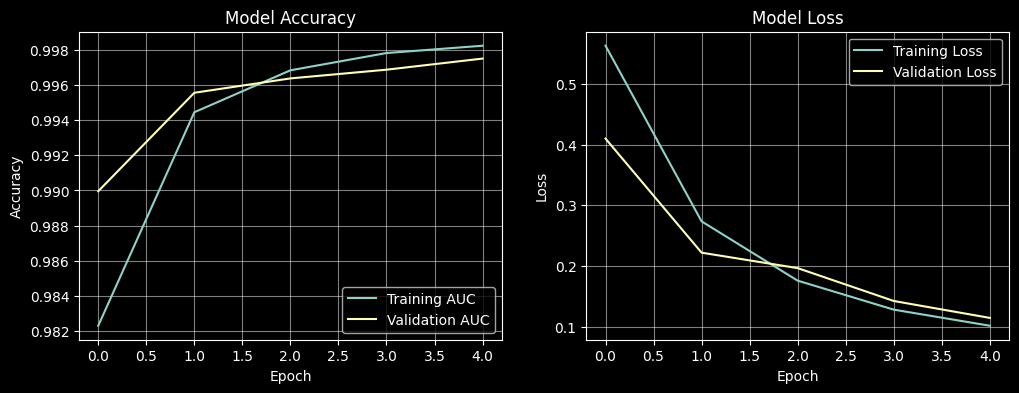

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the accuracy graph
ax1.plot(history.history['auc'], label='Training AUC')
ax1.plot(history.history['val_auc'], label='Validation AUC')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.grid(True, alpha=0.5)
ax1.legend(loc='lower right')

# Plot the loss graph
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.grid(True, alpha=0.5)
ax2.legend(loc='upper right')

plt.show()


In [ ]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [ ]:
model.evaluate(test_set)

348/348 [==============================] - 345s 990ms/step - loss: 2.5884 - auc: 0.8084


[2.5883796215057373, 0.8084400296211243]

In [ ]:
# import matplotlib.pyplot as plt

# # Get the training and testing accuracy and loss values for each epoch
# train_acc = history.history['auc']
# test_acc = history.history['auc']
# train_loss = history.history['loss']
# test_loss = history.history['loss']

# # Create a plot with two subplots, one for accuracy and one for loss
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# # Plot the training and testing accuracy
# ax1.plot(train_acc, label='Training accuracy')
# ax1.plot(test_acc, label='Testing accuracy')
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Accuracy')
# ax1.legend()

# # Plot the training and testing loss
# ax2.plot(train_loss, label='Training loss')
# ax2.plot(test_loss, label='Testing loss')
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Loss')
# ax2.legend()

# plt.show()
# -----------------------------------------------------------------------------

# import matplotlib.pyplot as plt

# # Get the testing accuracy and loss values for each epoch
# test_acc = history.history['auc']
# test_loss = history.history['loss']

# # Create a plot with two subplots, one for accuracy and one for loss
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# # Plot the testing accuracy
# ax1.plot(test_acc)
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Testing Accuracy')
# ax1.set_title('Testing Accuracy')

# # Plot the testing loss
# ax2.plot(test_loss)
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Testing Loss')
# ax2.set_title('Testing Loss')

# plt.show()



In [ ]:
y_pred=model.predict(test_set)

348/348 [==============================] - 340s 967ms/step


In [ ]:
y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Convert the predicted probabilities to a one-hot encoded array of predicted labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute the accuracy, precision, recall, and AUC
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('AUC:', auc)

Accuracy: 0.44666996003053844
Precision: 0.5535519115999445
Recall: 0.44666996003053844
AUC: 0.6528368742831472


this is for just cheking

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the training history from the CSV file
# history_df = pd.read_csv('/content/drive/MyDrive/Dataset/training_history.csv')
# # plt.style.use('default')


# # Plot the accuracy and loss graph
# plt.plot(history_df['auc'])
# plt.plot(history_df['val_auc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training AUC', 'Validation AUC'], loc='upper left')
# plt.show()

# plt.plot(history_df['loss'])
# plt.plot(history_df['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
# plt.show()
